<a href="https://colab.research.google.com/github/Huda-AbuZayed/Prediction-of-Product-Sales/blob/main/Project_4_Huda_AbuZayed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Adult income.
- Author: Huda J. AbuZayed


## Load and Inspect Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

# Sci-kit learn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')


In [3]:
df = pd.read_csv('/content/drive/MyDrive/adult.csv')
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

## Explore/clean the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [6]:
df.describe()

age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

# **Clean Data**

In [7]:
df.shape

(48842, 15)

There are 48842 rows and 15 columns.

In [8]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [9]:
obj_columns = df.select_dtypes('object').columns
obj_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [10]:
df[obj_columns]

workclass     education      marital-status         occupation  \
0           Private          11th       Never-married  Machine-op-inspct   
1           Private       HS-grad  Married-civ-spouse    Farming-fishing   
2         Local-gov    Assoc-acdm  Married-civ-spouse    Protective-serv   
3           Private  Some-college  Married-civ-spouse  Machine-op-inspct   
4                 ?  Some-college       Never-married                  ?   
...             ...           ...                 ...                ...   
48837       Private    Assoc-acdm  Married-civ-spouse       Tech-support   
48838       Private       HS-grad  Married-civ-spouse  Machine-op-inspct   
48839       Private       HS-grad             Widowed       Adm-clerical   
48840       Private       HS-grad       Never-married       Adm-clerical   
48841  Self-emp-inc       HS-grad  Married-civ-spouse    Exec-managerial   

      relationship   race  gender native-country income  
0        Own-child  Black    Male  United-States  <=50K  
1          Husband  White    Male  United-States  <=50K  
2          Husband  White    Male  United-States   >50K  
3          Husband  Black    Male  United-States   >50K  
4        Own-child  White  Female  United-States  <=50K  
...            ...    ...     ...            ...    ...  
48837         Wife  White  Female  United-States  <=50K  
48838      Husband  White    Male  United-States   >50K  
48839    Unmarried  White  Female  United-States  <=50K  
48840    Own-child  White    Male  United-States  <=50K  
48841         Wife  White  Female  United-States   >50K  

[48842 rows x 9 columns]

In [11]:
duplicated_rows = df.duplicated()
duplicated_rows

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

In [14]:
df.duplicated().sum()

52

In [15]:
df = df.drop_duplicates(keep = 'first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.isna().sum().sum()

0

There are no missing values

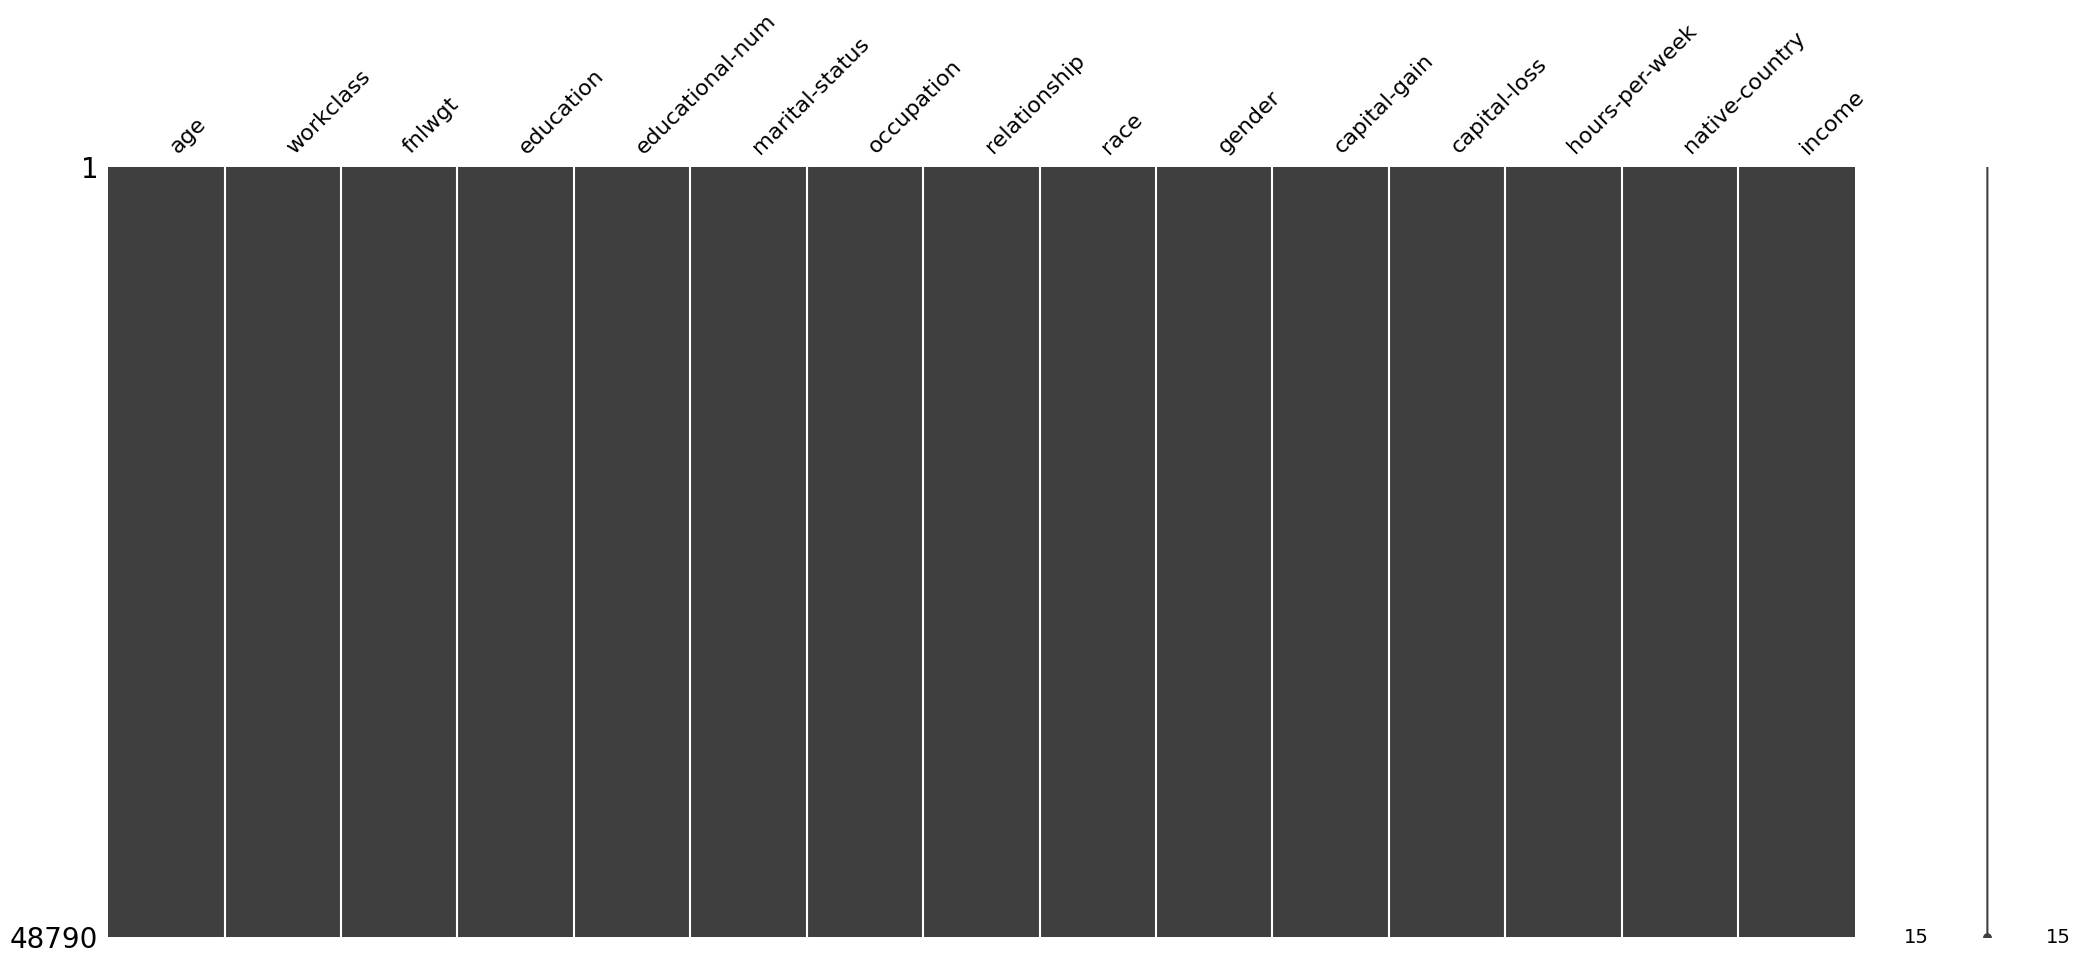

In [18]:
# Visualize the missing values using the missingno package's matrix plot.
import missingno as msno
msno.matrix(df);


In [19]:
# Identify string columns
string_cols = df.select_dtypes("object").columns
string_cols


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [20]:
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')


Value Counts for workclass
workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


Value Counts for education
education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64


Value Counts for marital-status
marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: 

In [22]:
df['workclass'].value_counts()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [23]:
df['workclass'] = df['workclass'].replace('?', 'other')

In [25]:
df['occupation'].value_counts()

occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [27]:
df['occupation'] = df['occupation'].replace('?', 'other')
df['occupation']

0        Machine-op-inspct
1          Farming-fishing
2          Protective-serv
3        Machine-op-inspct
4                    other
               ...        
48837         Tech-support
48838    Machine-op-inspct
48839         Adm-clerical
48840         Adm-clerical
48841      Exec-managerial
Name: occupation, Length: 48790, dtype: object

In [24]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: int64

In [21]:
df['native-country'].value_counts()

native-country
United-States                 43792
Mexico                          943
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                          45
France                           38
Ireland                          37
Hong                             30
Thailand                         30
Cambodia                         28
Trinadad&Tobago                  27
Laos                             23
Yugoslavia                       23
Outlying-US(Guam-USVI-etc)       23
Scotland                         21
Honduras                         20
Hungary                          19
Holand-Netherlands                1
Name: count, dtype: int64

In [28]:
# save list of numeric column names.
num_columns = df.select_dtypes('number').columns
num_columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

 ## Exploratory Data Analysis

1.   **EDA Function**

In [29]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, kde=True, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")


In [31]:
import seaborn as sns

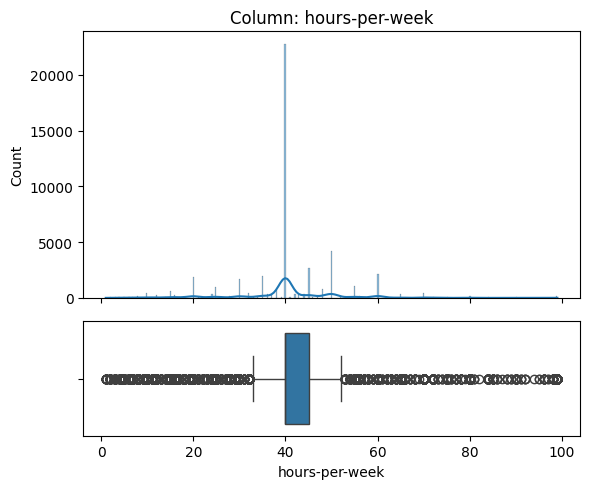

- NaN's Found: 0 (0.0%)


In [32]:
explore_numeric(df, 'hours-per-week')

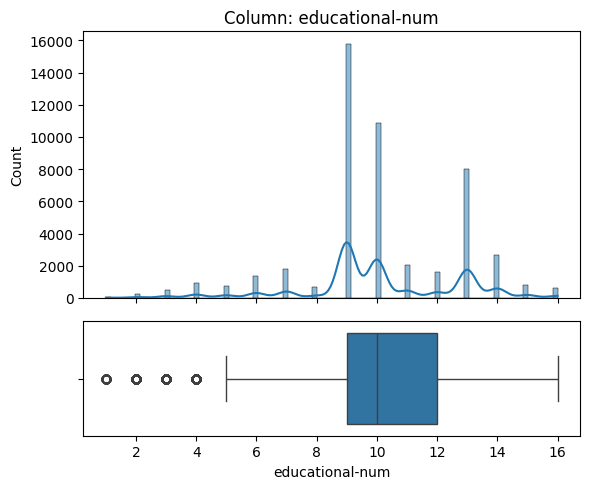

- NaN's Found: 0 (0.0%)


In [33]:
explore_numeric(df, 'educational-num')


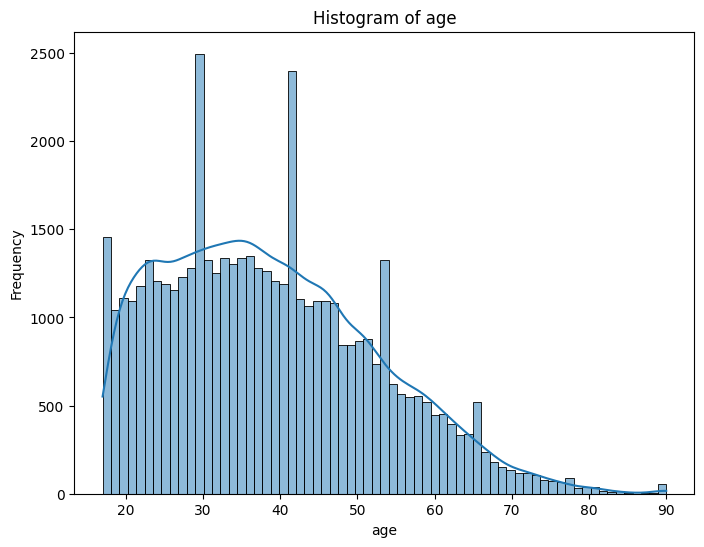

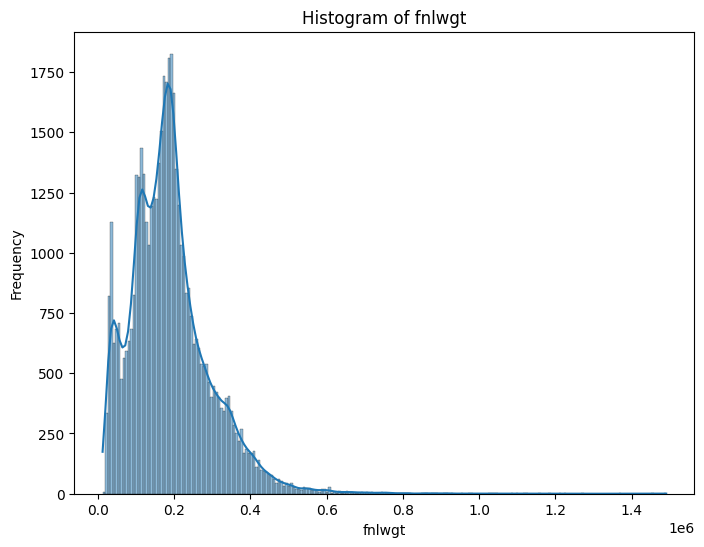

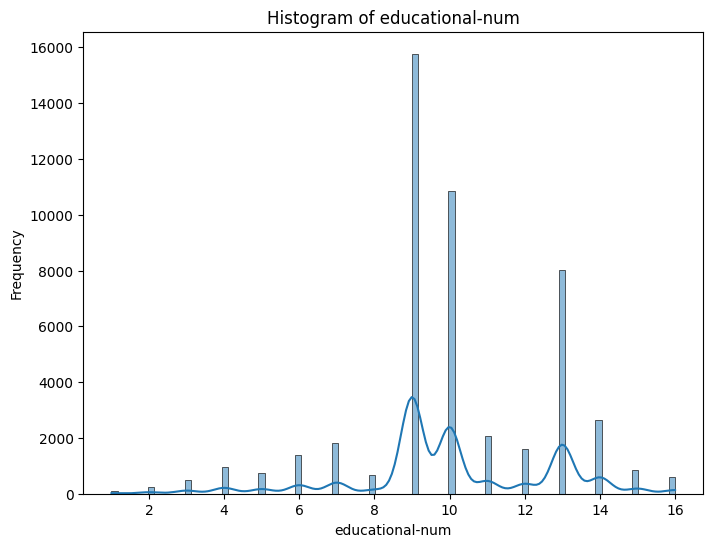

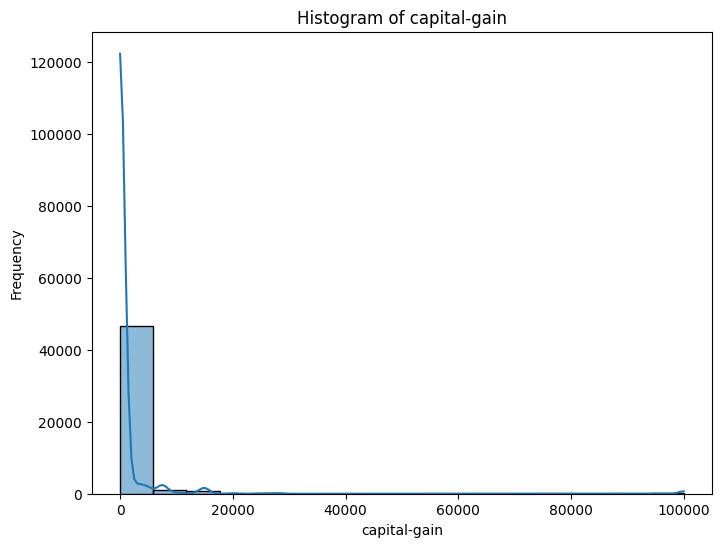

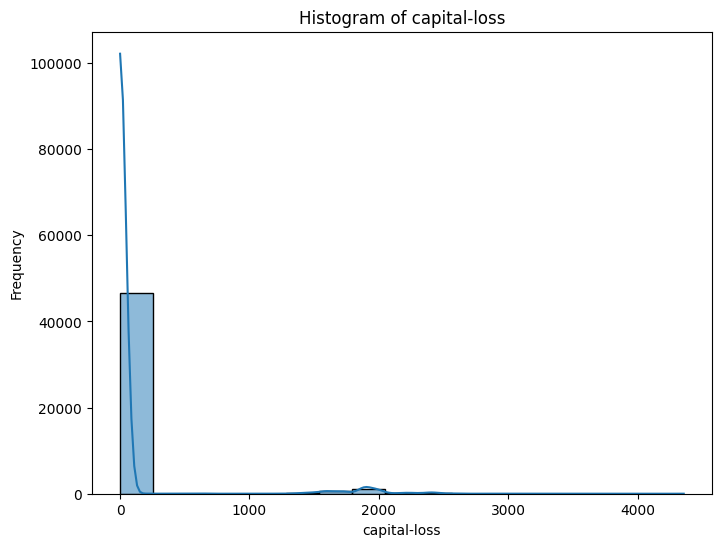

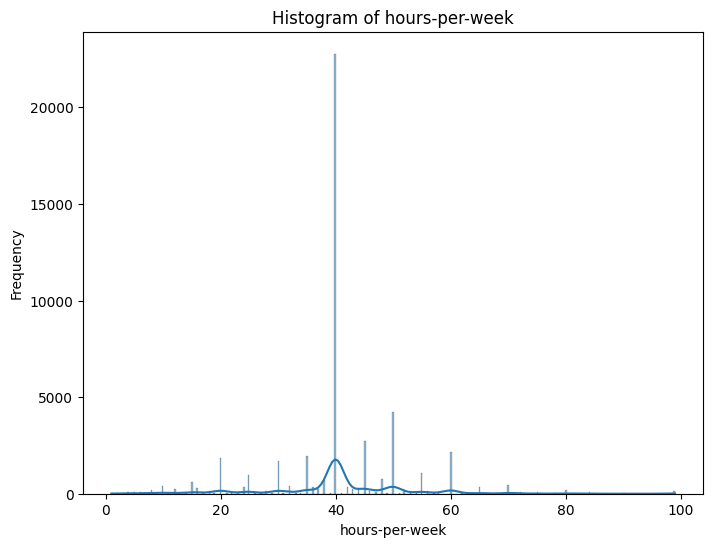

In [35]:
for col in num_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)  # Creating histogram using Seaborn
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<ipython-input-36-48af9c19b8f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col],palette='dark')  # Creating boxplot using Seaborn


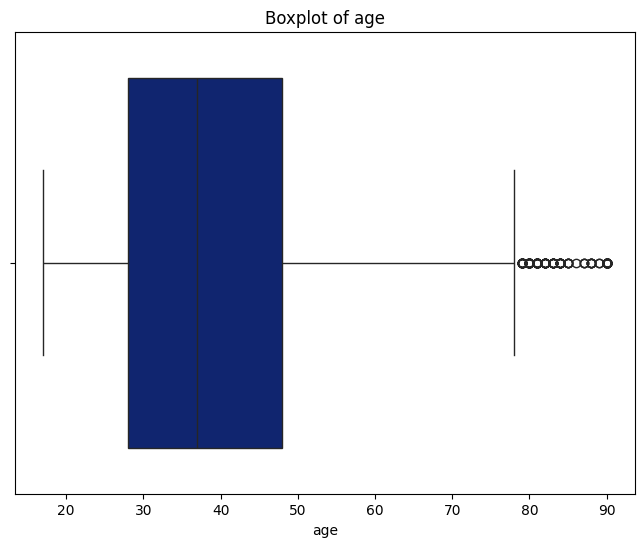

<ipython-input-36-48af9c19b8f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col],palette='dark')  # Creating boxplot using Seaborn


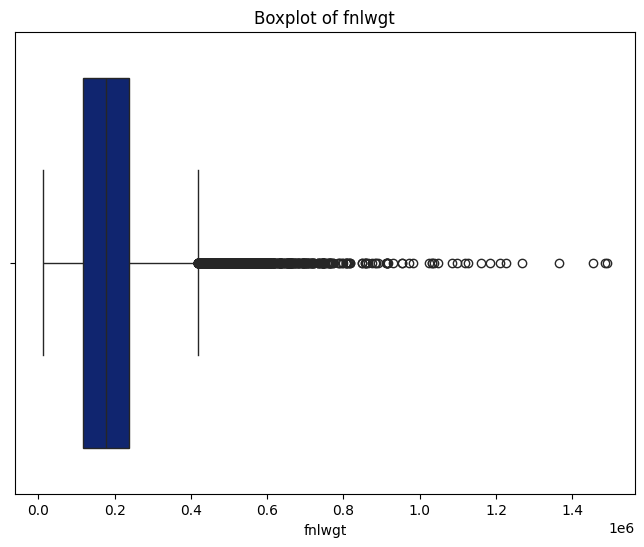

<ipython-input-36-48af9c19b8f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col],palette='dark')  # Creating boxplot using Seaborn


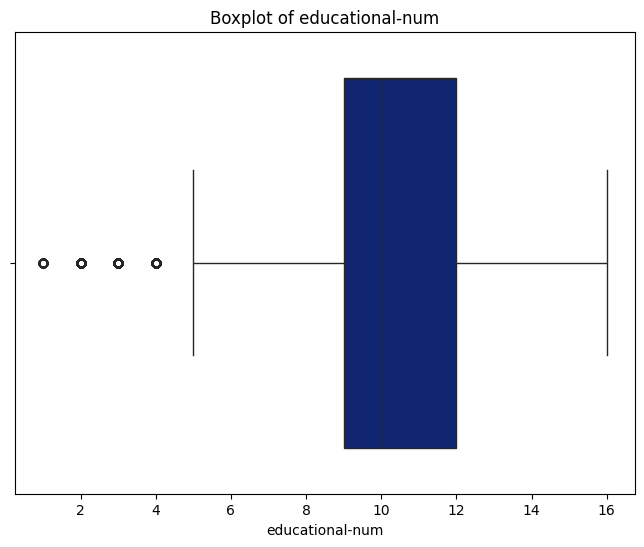

<ipython-input-36-48af9c19b8f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col],palette='dark')  # Creating boxplot using Seaborn


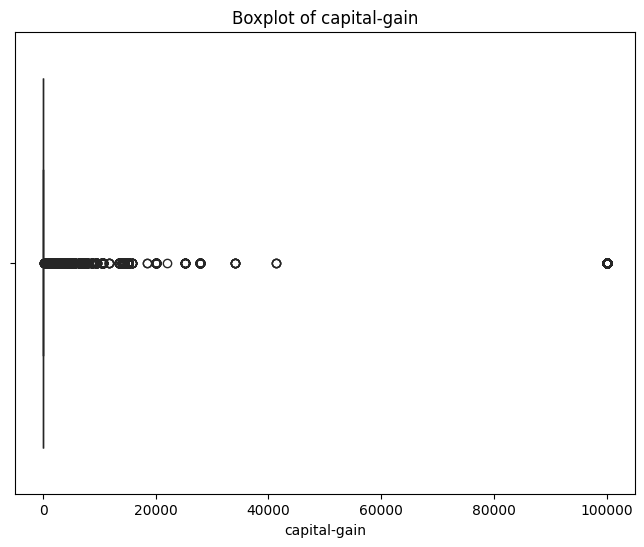

<ipython-input-36-48af9c19b8f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col],palette='dark')  # Creating boxplot using Seaborn


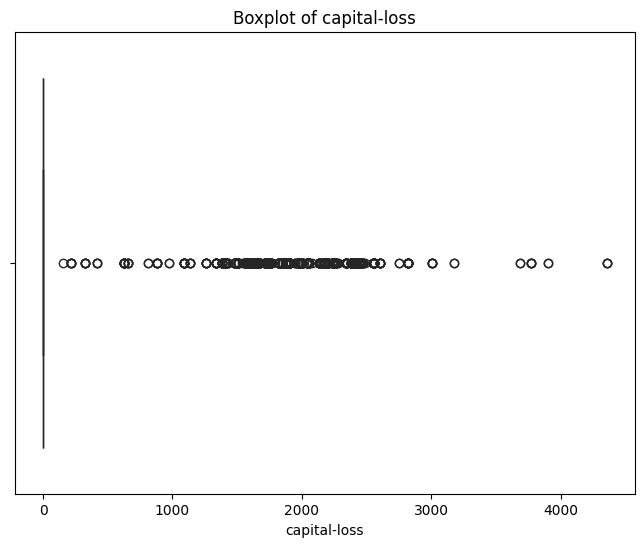

<ipython-input-36-48af9c19b8f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col],palette='dark')  # Creating boxplot using Seaborn


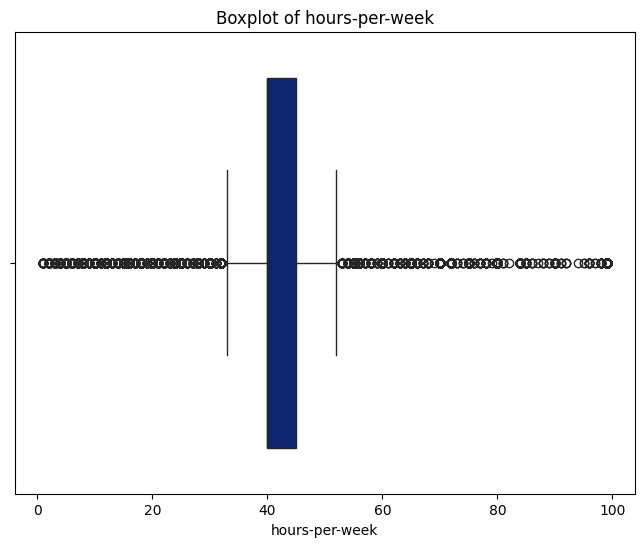

In [36]:
for col in num_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col],palette='dark')  # Creating boxplot using Seaborn
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

2.   **EDA Function for exploring categorical features**


In [47]:
cat_columns = df.select_dtypes('object').columns
cat_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [48]:
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order, palette='Set3')
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax



<ipython-input-48-a7f151ba0707>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=x, ax=ax, order=order, palette='Set3')
<ipython-input-48-a7f151ba0707>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


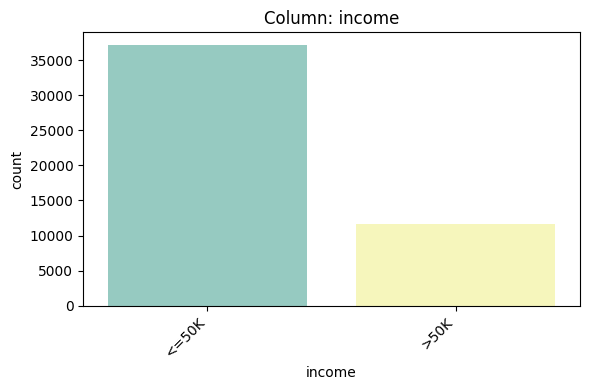

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '<=50K' occurs 37109 times (76.06%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: income'}, xlabel='income', ylabel='count'>)

In [49]:
explore_categorical(df, 'income')

<ipython-input-37-4be3cc3690c8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x ='workclass', palette='Set3')


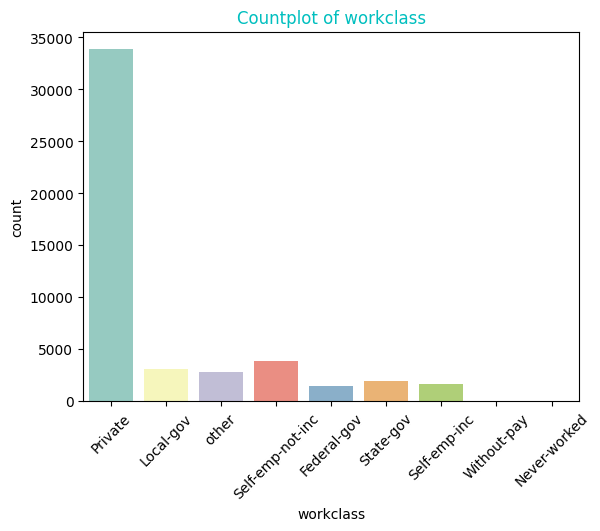

In [37]:
ax = sns.countplot(data = df, x ='workclass', palette='Set3')
plt.title('Countplot of workclass', c='c')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()


In [38]:
df['income'].value_counts()

income
<=50K    37109
>50K     11681
Name: count, dtype: int64

<ipython-input-39-10ad261ddec6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x ='income', palette='Set3');


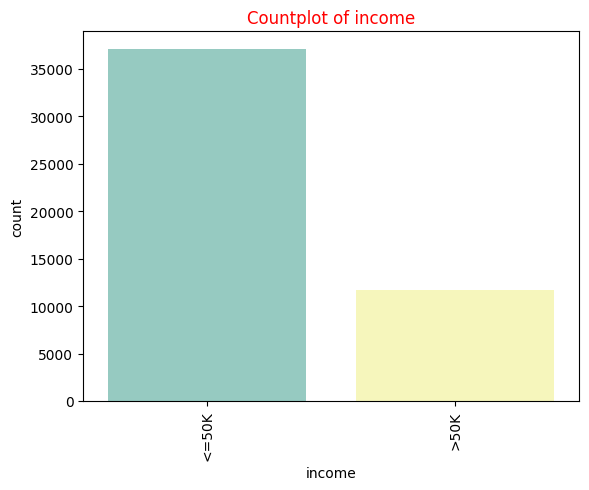

In [39]:
ax = sns.countplot(data = df, x ='income', palette='Set3');
plt.title('Countplot of income', c='r');

plt.xticks(rotation=90);  # Rotating x-axis labels for better readability
plt.show();


What is the target?


*   The target is the income column.

What does one row represent?

*    A person.

How many features does the data have?
*    15.

How many rows are in the dataset?
*    48842 rows.

What opportunities exist for dimensionality reduction or feature selection with this dataset?
*    We can apply PCA to reduce dimensions.

In [40]:
target = 'income'
y = df[target].copy()
X = df.drop(columns = target).copy()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321)
X_train.head()

age         workclass  fnlwgt  education  educational-num  \
22941   43           Private  124692  Bachelors               13   
14212   42  Self-emp-not-inc  116197    HS-grad                9   
22859   51           Private  125796       11th                7   
32414   25         Local-gov  198813  Bachelors               13   
42201   24           Private  278130  Assoc-voc               11   

           marital-status         occupation    relationship   race  gender  \
22941  Married-civ-spouse              Sales         Husband  White    Male   
14212  Married-civ-spouse       Craft-repair         Husband  White    Male   
22859           Separated      Other-service   Not-in-family  Black  Female   
32414       Never-married       Adm-clerical  Other-relative  Black  Female   
42201       Never-married  Machine-op-inspct   Not-in-family  White    Male   

       capital-gain  capital-loss  hours-per-week native-country  
22941             0             0              40  United-States  
14212             0             0              40  United-States  
22859             0             0              40        Jamaica  
32414             0             0              40  United-States  
42201             0             0              40  United-States

In [43]:
num_cols = X_train.select_dtypes("number").columns
# instantiate preprocessors
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(scaler)
num_tuple = ('numeric', num_pipe, num_cols)

In [44]:
ohe_cols = X_train.select_dtypes('object').columns
# Instantiate the individual preprocessors
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with encoder
ohe_pipe = make_pipeline(ohe_encoder)
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

In [45]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([ohe_tuple, num_tuple], verbose_feature_names_out = False)
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')),
                                ('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [46]:
# preprocessing the data and using get feature names out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'workclass_other',
       'education_10th', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_E

In [50]:
# make a dataframe for X train data transformed
X_train_tf = pd.DataFrame(preprocessor.transform(X_train), columns = feature_names, index = X_train.index)
X_train_tf.head()

workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
22941                    0.0                  0.0                     0.0   
14212                    0.0                  0.0                     0.0   
22859                    0.0                  0.0                     0.0   
32414                    0.0                  1.0                     0.0   
42201                    0.0                  0.0                     0.0   

       workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
22941                1.0                     0.0                         0.0   
14212                0.0                     0.0                         1.0   
22859                1.0                     0.0                         0.0   
32414                0.0                     0.0                         0.0   
42201                1.0                     0.0                         0.0   

       workclass_State-gov  workclass_Without-pay  workclass_other  \
22941                  0.0                    0.0              0.0   
14212                  0.0                    0.0              0.0   
22859                  0.0                    0.0              0.0   
32414                  0.0                    0.0              0.0   
42201                  0.0                    0.0              0.0   

       education_10th  ...  native-country_Trinadad&Tobago  \
22941             0.0  ...                             0.0   
14212             0.0  ...                             0.0   
22859             0.0  ...                             0.0   
32414             0.0  ...                             0.0   
42201             0.0  ...                             0.0   

       native-country_United-States  native-country_Vietnam  \
22941                           1.0                     0.0   
14212                           1.0                     0.0   
22859                           0.0                     0.0   
32414                           1.0                     0.0   
42201                           1.0                     0.0   

       native-country_Yugoslavia       age    fnlwgt  educational-num  \
22941                        0.0  0.316225 -0.616217         1.142317   
14212                        0.0  0.243334 -0.696497        -0.419762   
22859                        0.0  0.899354 -0.605784        -1.200801   
32414                        0.0 -0.995814  0.084246         1.142317   
42201                        0.0 -1.068705  0.833812         0.361278   

       capital-gain  capital-loss  hours-per-week  
22941     -0.145073     -0.214456       -0.034492  
14212     -0.145073     -0.214456       -0.034492  
22859     -0.145073     -0.214456       -0.034492  
32414     -0.145073     -0.214456       -0.034492  
42201     -0.145073     -0.214456       -0.034492  

[5 rows x 108 columns]

In [51]:
# make a dataframe for X test data transformed
X_test_tf = pd.DataFrame(preprocessor.transform(X_test), columns = feature_names, index = X_test.index)
X_test_tf.head()

workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
21490                    0.0                  0.0                     0.0   
34393                    1.0                  0.0                     0.0   
3677                     0.0                  0.0                     0.0   
48004                    0.0                  0.0                     0.0   
8207                     0.0                  0.0                     0.0   

       workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
21490                0.0                     0.0                         0.0   
34393                0.0                     0.0                         0.0   
3677                 1.0                     0.0                         0.0   
48004                0.0                     0.0                         0.0   
8207                 1.0                     0.0                         0.0   

       workclass_State-gov  workclass_Without-pay  workclass_other  \
21490                  0.0                    0.0              1.0   
34393                  0.0                    0.0              0.0   
3677                   0.0                    0.0              0.0   
48004                  0.0                    0.0              1.0   
8207                   0.0                    0.0              0.0   

       education_10th  ...  native-country_Trinadad&Tobago  \
21490             0.0  ...                             0.0   
34393             0.0  ...                             0.0   
3677              0.0  ...                             0.0   
48004             0.0  ...                             0.0   
8207              0.0  ...                             0.0   

       native-country_United-States  native-country_Vietnam  \
21490                           1.0                     0.0   
34393                           1.0                     0.0   
3677                            0.0                     0.0   
48004                           1.0                     0.0   
8207                            1.0                     0.0   

       native-country_Yugoslavia       age    fnlwgt  educational-num  \
21490                        0.0 -0.995814  0.683694         0.361278   
34393                        0.0  0.534898 -0.465277        -0.029242   
3677                         0.0 -1.068705  1.107898        -0.029242   
48004                        0.0 -0.558468  0.654162        -0.029242   
8207                         0.0 -1.214487 -0.613212         1.142317   

       capital-gain  capital-loss  hours-per-week  
21490      0.301887     -0.214456       -0.034492  
34393     -0.145073     -0.214456        0.611149  
3677      -0.145073     -0.214456       -0.034492  
48004     -0.145073     -0.214456       -2.455646  
8207      -0.145073     -0.214456       -0.841544  

[5 rows x 108 columns]

## Import the functions of classification model

In [52]:
# Updating function
def plot_categorical_vs_target(df, x, y, figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None, target_type='reg'):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
  # REGRESSION-TARGET PLOT
  if target_type=='reg': #Added if statement here
    # Barplot
    sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)
    # Boxplot
    sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3,zorder=0)
  # CLASSIFICATION-TARGET PLOT # This is the new code for the classification task
  elif target_type=='class':
    ax = sns.histplot(data=temp_df, hue=y, x=x, stat='percent',  multiple='fill')
  # Rotate xlabels
  ax.set_xticks(ax.get_xticks()) # Added this to prevent a bug
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax



(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'workclass vs. income'}, xlabel='workclass', ylabel='Percent'>)

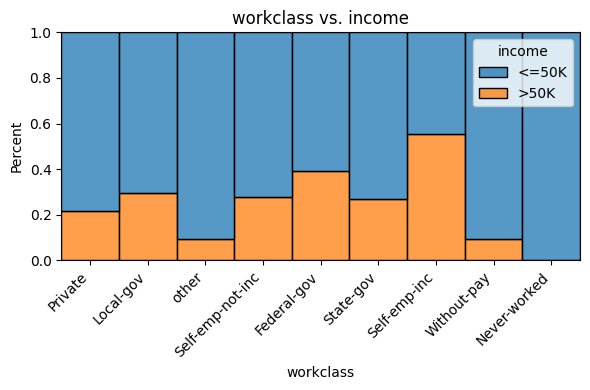

In [53]:
plot_categorical_vs_target(df, 'workclass', 'income', target_type='class')

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'marital-status vs. income'}, xlabel='marital-status', ylabel='Percent'>)

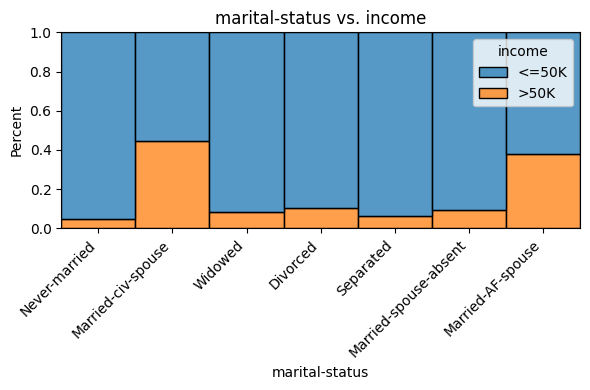

In [57]:
plot_categorical_vs_target(df, 'marital-status', 'income', target_type='class')

In [54]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
def classification_metrics(y_true, y_pred, label = '', output_dict = False, figsize = (8,4), normalize = 'true', cmap = 'Blues', colorbar = False):
  report = classification_report(y_true, y_pred)
  header = '-'*70
  print(header, f'Classification Metrics: {label}', header, sep = '\n')
  print(report)
  fig, axes = plt.subplots(ncols = 2, figsize = figsize)
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize = None, cmap = 'gist_gray', colorbar = colorbar, ax = axes[0]);
  axes[0].set_title('Row Counts')

  ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize = normalize, cmap = cmap, colorbar = colorbar, ax = axes[1]);
  axes[1].set_title('Normalized Confusion Matrix')

  fig.tight_layout()
  plt.show()

  if output_dict == True:
    report_dict = classification_report(y_true, y_pred, output_dict = True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test, figsize = (6,4), normalize = 'true', output_dict = False, cmap_train = 'Blues',
                            cmap_test = 'Reds', colorbar = False):
  y_train_pred = model.predict(X_train)
  results_train = classification_metrics(y_train, y_train_pred, output_dict = True, figsize = figsize, colorbar = colorbar, cmap = cmap_train,
                                         label = 'Training Data')
  print()
  y_test_pred = model.predict(X_test)
  results_test = classification_metrics(y_test, y_test_pred, output_dict = True, figsize = figsize, colorbar = colorbar, cmap = cmap_test,
                                         label = 'Testing Data')
  if output_dict == True:
    results_dict = {'train':results_train, 'trst': results_test}
    return results_dict

Create Explanatory Visualizations for the most important features

In [55]:
def get_importances(model, feature_names = None, name = 'Feature Importances', sort = False, ascending = True):
  if feature_names == None:
    feature_names = model.feature_names_in_
    importances = pd.Series(model.feature_importances_, index = feature_names, name = name)

    if sort == True:
      importances = importances.sort_values(ascending = ascending)

      return importances

In [56]:
def plot_importances(importances, top_n = None, figsize = (8,6)):
  if top_n == None:
    plot_vals = importances.sort_values()
    title = 'All Features - Ranked by Importance'
  else:
    plot_vals = importances.sort_values().tail(top_n)
    title = f'Top {top_n} Most Important Features'

  ax = plot_vals.plot(kind = 'barh', figsize = figsize)
  ax.set(xlabel = 'Importances', ylabel = 'Feature Names', title = title)
  return ax

----------------------------------------------------------------------
Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     27911
        >50K       1.00      1.00      1.00      8681

    accuracy                           1.00     36592
   macro avg       1.00      1.00      1.00     36592
weighted avg       1.00      1.00      1.00     36592



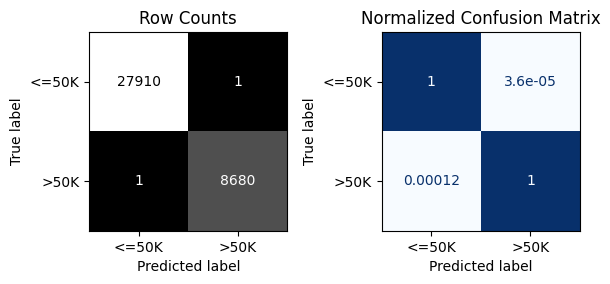


----------------------------------------------------------------------
Classification Metrics: Testing Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      9198
        >50K       0.73      0.63      0.68      3000

    accuracy                           0.85     12198
   macro avg       0.81      0.78      0.79     12198
weighted avg       0.85      0.85      0.85     12198



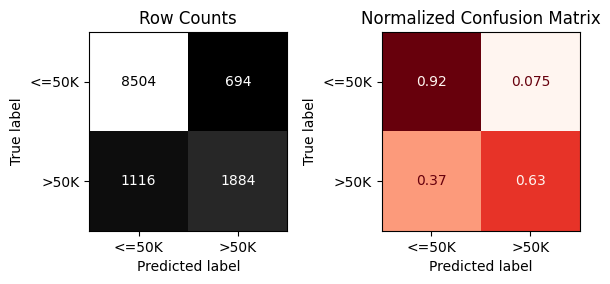

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_tf,y_train)
evaluate_classification(rf, X_train_tf, y_train, X_test_tf,y_test)

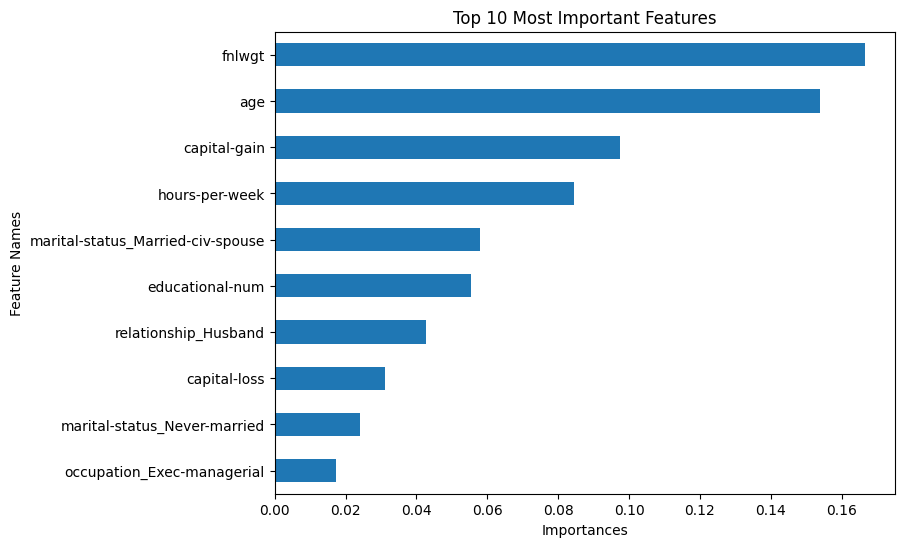

In [59]:
# Saving the important features
importances = get_importances(rf, sort = True, ascending = False, name = 'RandomForest Importances')
plot_importances(importances, top_n=10);

**Select 2 out of the top 10 features from your permutation importances and produce explanatory visualizations showing the relationship between the feature and the target.**

<ipython-input-60-efde35bdd430>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='income', y='fnlwgt', palette='viridis')


<Axes: xlabel='income', ylabel='fnlwgt'>

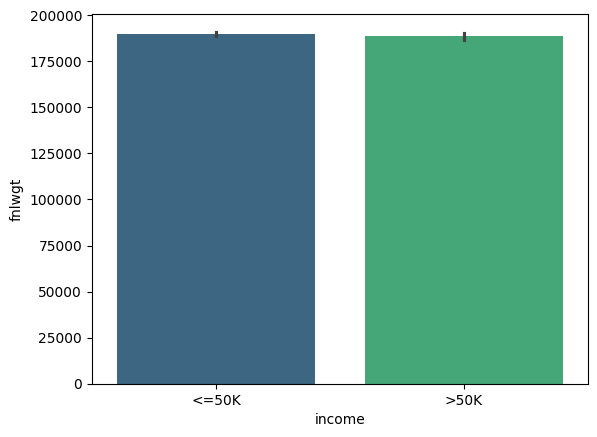

In [60]:
sns.barplot(data=df, x='income', y='fnlwgt', palette='viridis')

<ipython-input-61-f19e312baf1b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'income', y = 'age', palette='coolwarm')


<Axes: xlabel='income', ylabel='age'>

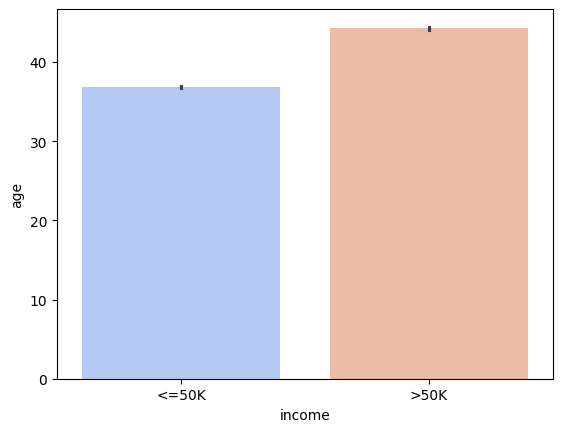

In [61]:
sns.barplot(data = df, x = 'income', y = 'age', palette='coolwarm')

From the graph we can see that The average age of individuals with an income of is 50k or more is approximately 37 years, while the average age of those earning less than 50K is 45 years.

In [62]:
from imblearn.over_sampling import SMOTE, SMOTENC
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train_tf, y_train)
y_train_sm.value_counts()

income
>50K     27911
<=50K    27911
Name: count, dtype: int64

----------------------------------------------------------------------
Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     27911
        >50K       1.00      1.00      1.00     27911

    accuracy                           1.00     55822
   macro avg       1.00      1.00      1.00     55822
weighted avg       1.00      1.00      1.00     55822



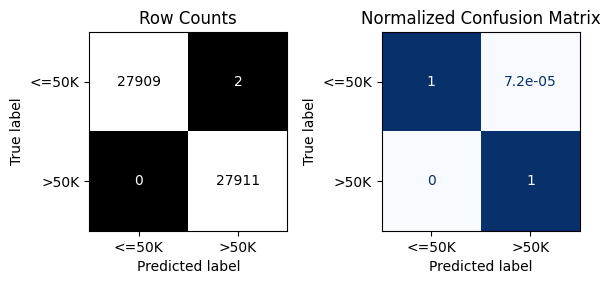


----------------------------------------------------------------------
Classification Metrics: Testing Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.90      0.89      0.89      9198
        >50K       0.67      0.70      0.68      3000

    accuracy                           0.84     12198
   macro avg       0.79      0.79      0.79     12198
weighted avg       0.84      0.84      0.84     12198



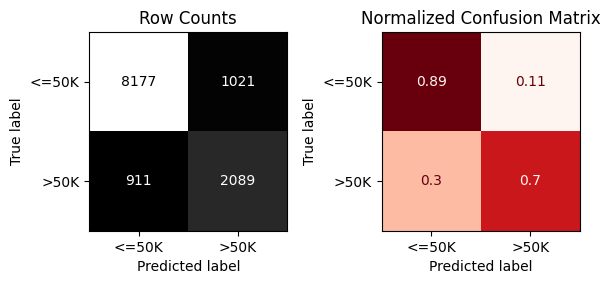

Training Time was: 0:00:14.537872


In [63]:
import datetime as dt
start = dt.datetime.now()
clf = RandomForestClassifier(random_state = 321)
clf.fit(X_train_sm, y_train_sm)
end = dt.datetime.now()
dur_baseline = end - start
evaluate_classification(clf, X_train_sm, y_train_sm, X_test_tf, y_test)
print(f'Training Time was: {dur_baseline}')

Apply PCA to get 3 principal components for the data. Concatenate/combine these PC’s with the original features (X_train, X_test data).

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train_sm)
X_test_pca = pca.fit_transform(X_test_tf)
X_train_pca.head()

pca0      pca1      pca2
0  0.163258  0.484728 -0.958619
1 -0.320246 -0.152383 -0.509348
2 -0.745087 -0.942123  0.392690
3 -0.366796 -0.498309  0.414858
4 -0.560912 -0.724074  0.614732

----------------------------------------------------------------------
Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     27911
        >50K       1.00      1.00      1.00     27911

    accuracy                           1.00     55822
   macro avg       1.00      1.00      1.00     55822
weighted avg       1.00      1.00      1.00     55822



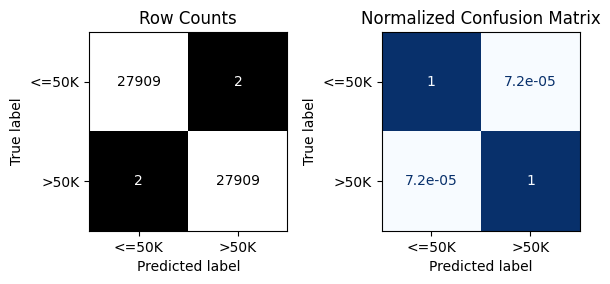


----------------------------------------------------------------------
Classification Metrics: Testing Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.94      0.65      0.77      9198
        >50K       0.45      0.88      0.59      3000

    accuracy                           0.70     12198
   macro avg       0.70      0.76      0.68     12198
weighted avg       0.82      0.70      0.72     12198



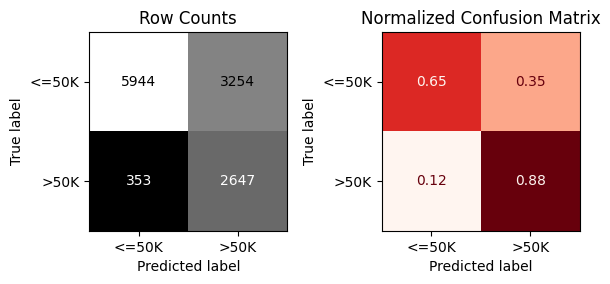

Training Time was: 0:00:16.855252


In [65]:
start = dt.datetime.now()
clf = RandomForestClassifier(random_state = 321)
clf.fit(X_train_pca, y_train_sm)
end = dt.datetime.now()
dur_pca = end - start
evaluate_classification(clf, X_train_pca, y_train_sm, X_test_pca, y_test)
print(f'Training Time was: {dur_pca}')

In [67]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
#Keras
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout


In [70]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float', 'int']).columns

# Select only numerical columns for scaling
df_numerical = df[numerical_cols]

# Apply StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_numerical)

# Convert the scaled array back to a DataFrame (optional)
scaled_df = pd.DataFrame(scaled_df, columns=numerical_cols)
print(scaled_df)

            age    fnlwgt  educational-num  capital-gain  capital-loss  \
0     -0.995947  0.351584        -1.197970     -0.144882     -0.217248   
1     -0.047620 -0.945452        -0.419766     -0.144882     -0.217248   
2     -0.777103  1.394503         0.747540     -0.144882     -0.217248   
3      0.390069 -0.277855        -0.030664      0.886257     -0.217248   
4     -1.506585 -0.815898        -0.030664     -0.144882     -0.217248   
...         ...       ...              ...           ...           ...   
48837 -0.850051  0.640366         0.747540     -0.144882     -0.217248   
48838  0.098276 -0.334182        -0.419766     -0.144882     -0.217248   
48839  1.411344 -0.357512        -0.419766     -0.144882     -0.217248   
48840 -1.214792  0.111924        -0.419766     -0.144882     -0.217248   
48841  0.973655  0.930331        -0.419766      1.870185     -0.217248   

       hours-per-week  
0           -0.034366  
1            0.772567  
2           -0.034366  
3           -0.

Text(0, 0.5, 'inertia')

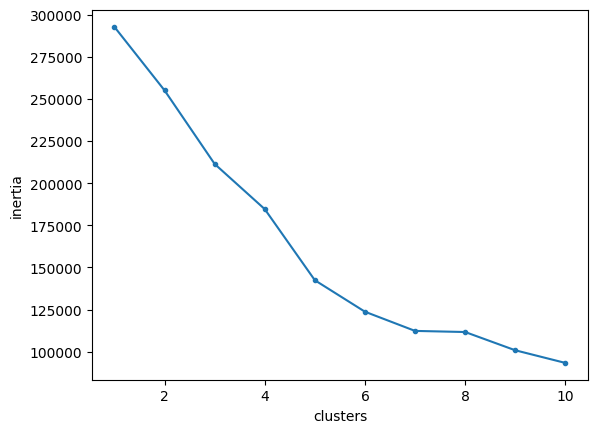

In [71]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state = 42)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(1,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

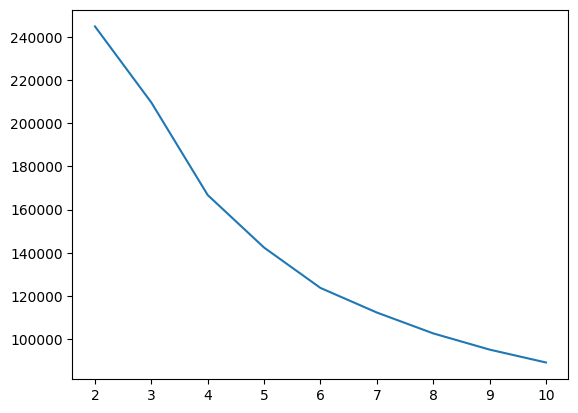

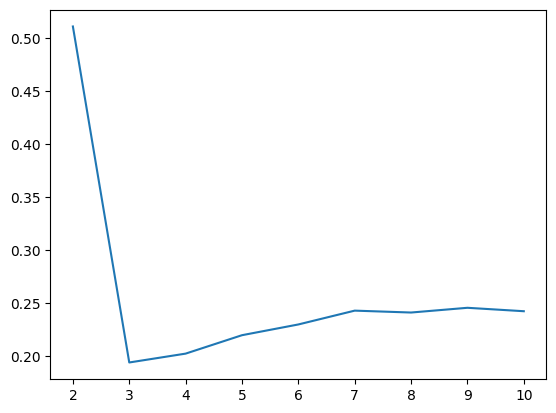

In [72]:
from sklearn.metrics import silhouette_score
ks = range(2, 11)

inertias = []
sils = []

for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(scaled_df)
  inertias.append(model.inertia_)
  sils.append(silhouette_score(scaled_df, model.labels_))

plt.plot(ks, inertias)

plt.show()

plt.plot(ks, sils)

The first line plot (Elbow) shows that the graph starts to level off at 3 or 4 clusters.

And from the second line plot we can see that 2 would be the best number of clusters for our data since it has the highest Silhouette Score. we will try and visualize 3 clusters.

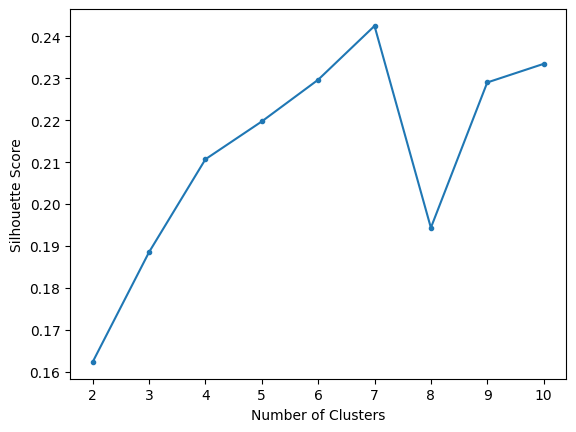

In [73]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i, n_init = 'auto', random_state = 42)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [74]:
kmeans = KMeans(n_clusters=6, n_init= 'auto', random_state=42)
kmeans.fit(scaled_df)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18      other  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4              other    Own-child  White  Female             0             0   

   hours-per-week native-country income  cluster  
0              40  United-States  <=50K        5  
1              50  United-States  <=50K        0  
2              40  United-States   >50K        1  
3              40  United-States   >50K        2  
4              30  United-States  <=50K        5

In [78]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean(numeric_only=True) # Tell pandas to only calculate the mean of numeric columns
cluster_groups

cluster        age         fnlwgt  educational-num  capital-gain  \
0        0  40.134661  158713.924703        12.479663   1234.497970   
1        1  34.019997  367156.331868         9.696355    451.177422   
2        2  55.487155  161178.990798         8.560775    572.612922   
3        3  41.787215  188137.967814        10.997318      0.000000   
4        4  46.610656  185547.946721        13.024590  99999.000000   
5        5  27.794306  155067.106144         9.090673    192.311458   

   capital-loss  hours-per-week  
0      0.602604       48.872463  
1      0.765991       40.334421  
2      0.589245       36.967504  
3   1898.745194       43.345552  
4      0.000000       50.475410  
5      0.436244       35.192822

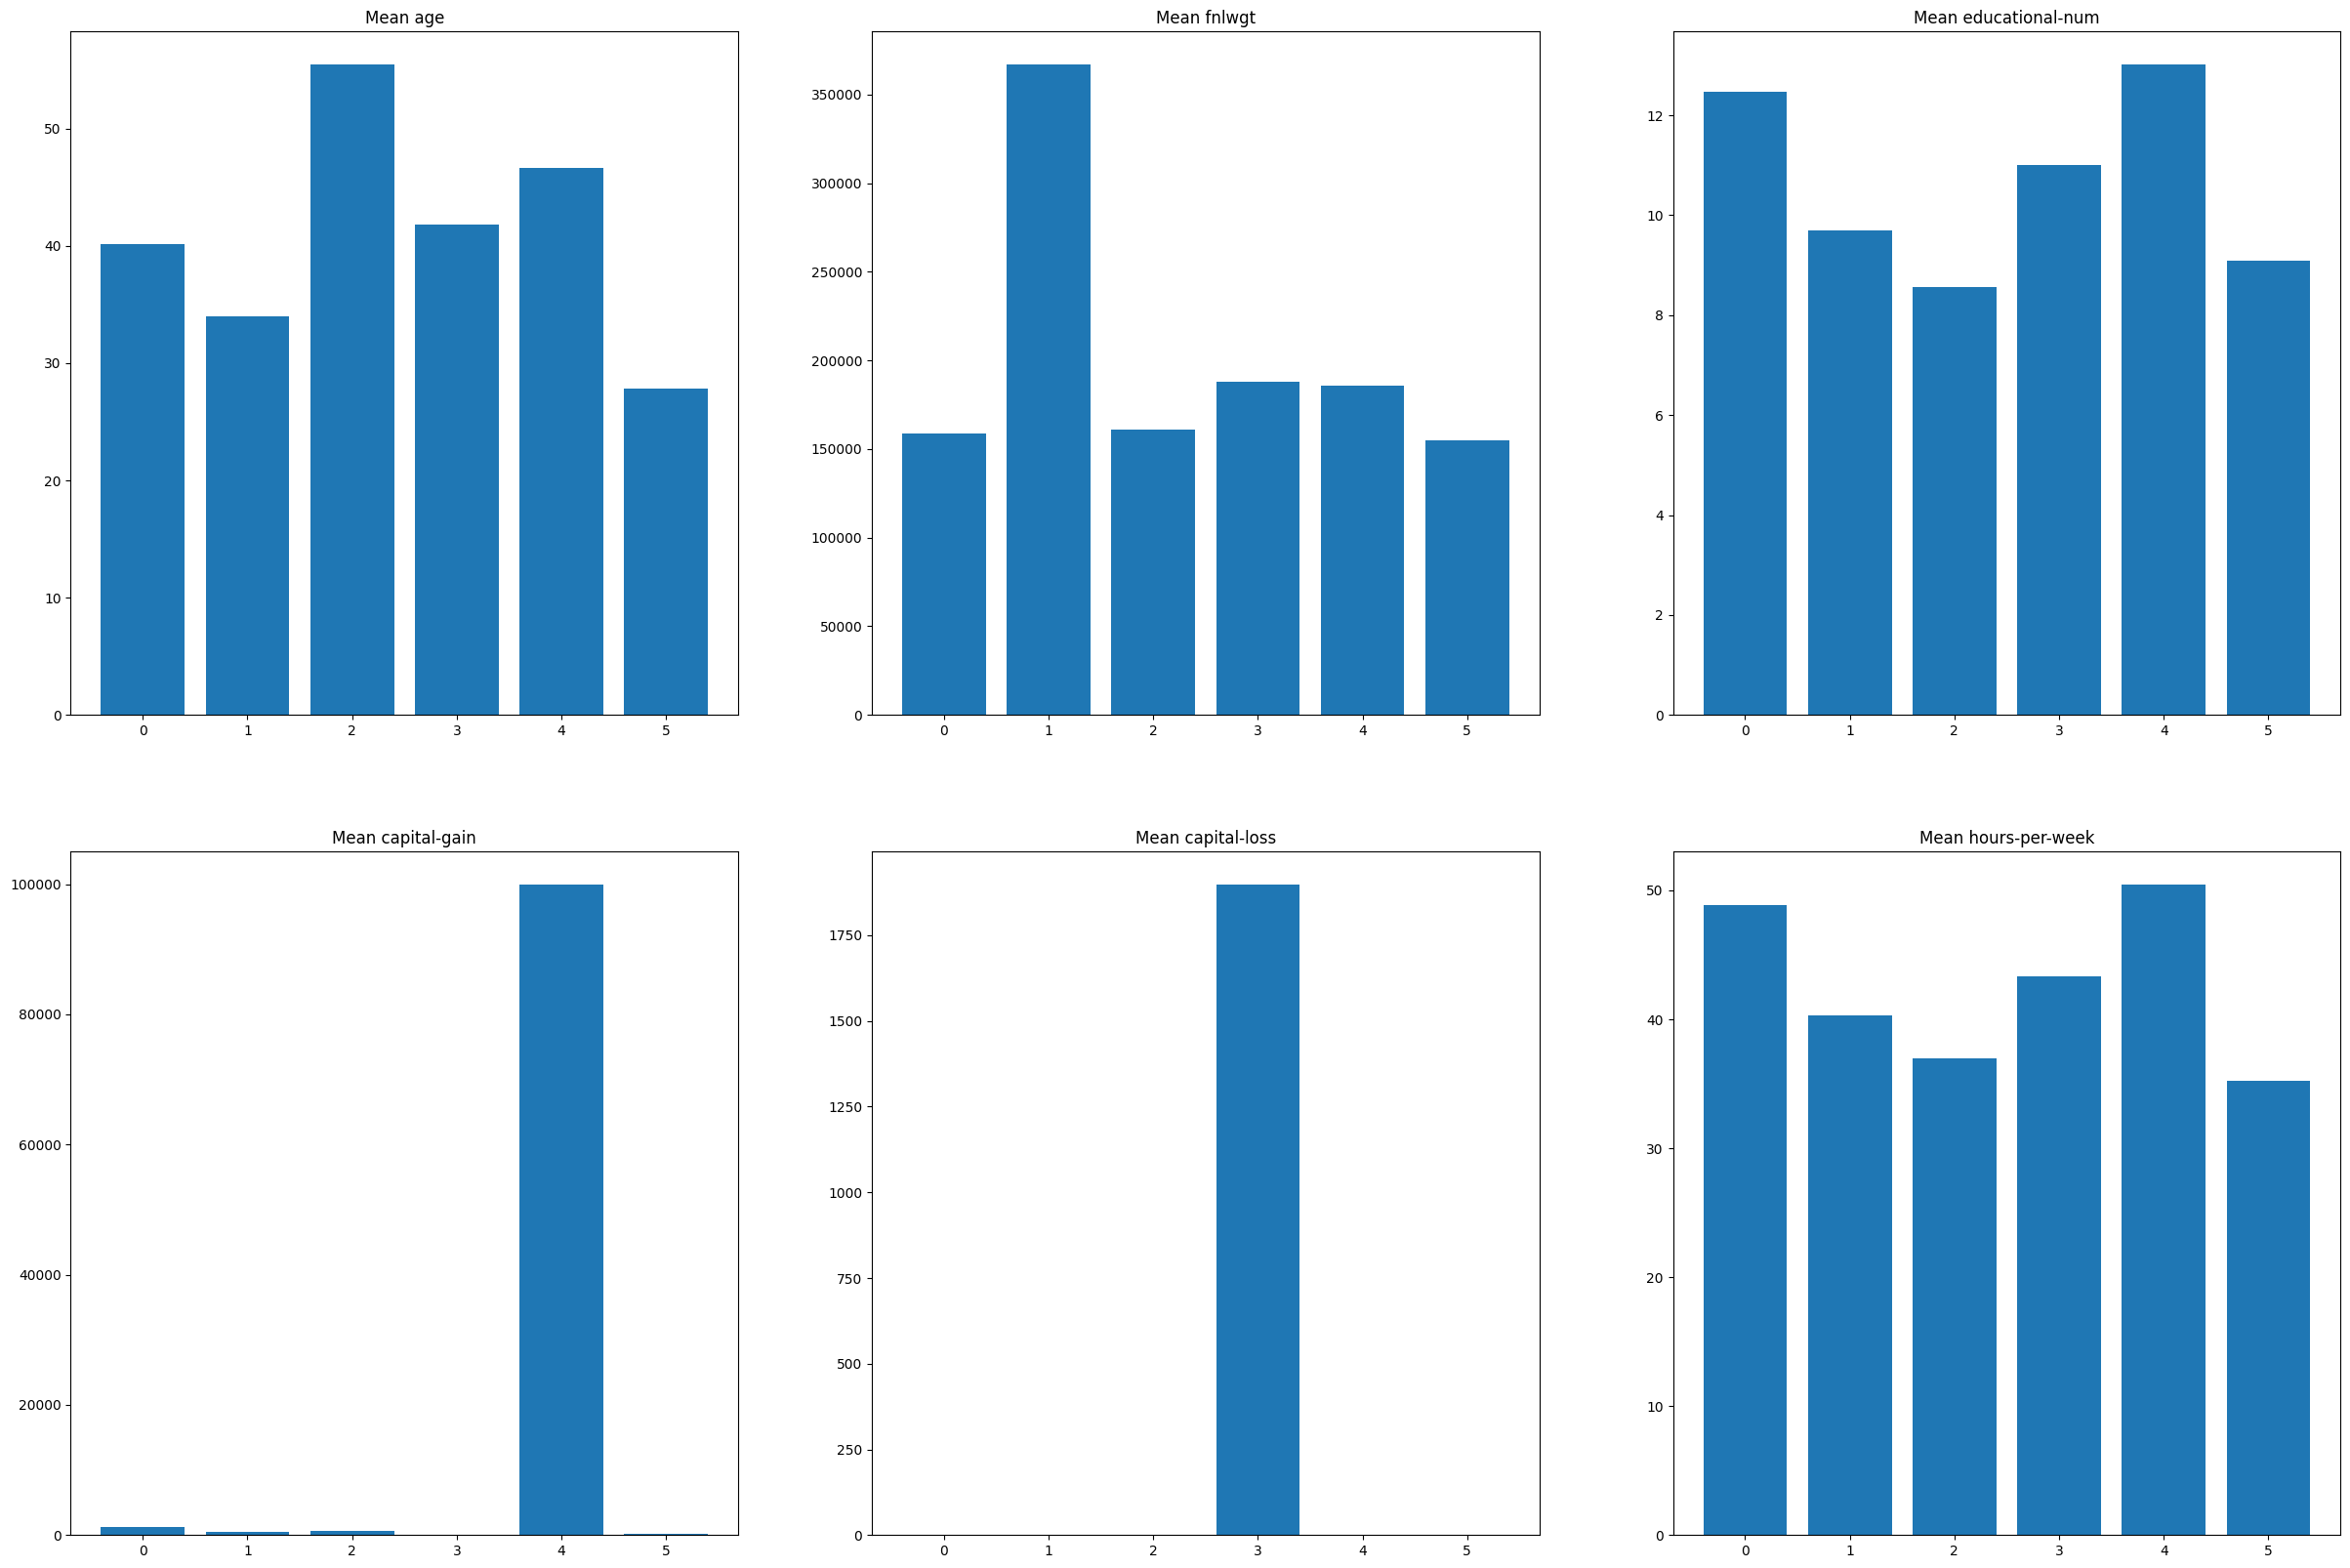

In [87]:
# Visualize means
fig, axes = plt.subplots(2,3, figsize = (30, 20))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

In [84]:
# Instantiate PCA to make 2 principal components
pca = PCA(n_components=2)
# Create and define the principal components
pca = pca.fit_transform(scaled_df)
pca


pca0      pca1
0     -1.238651  0.413329
1      0.213581 -0.507822
2     -0.293740  1.393842
3      0.491553  0.109383
4     -0.980622  0.053393
...         ...       ...
48837 -0.257575  0.935315
48838 -0.264881 -0.328345
48839  0.236871 -0.934545
48840 -1.678428  0.275123
48841  0.688033  0.931045

[48790 rows x 2 columns]

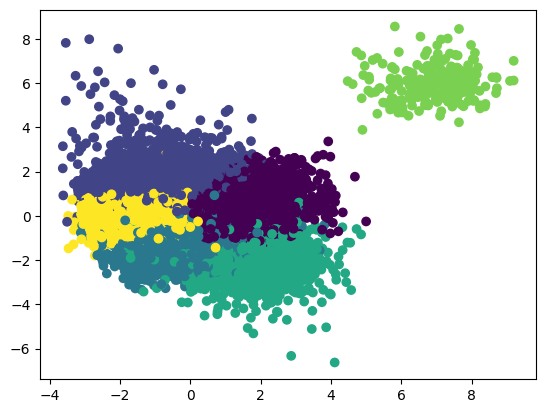

In [85]:
# 2pca
plt.scatter(pca['pca0'], pca['pca1'], c=kmeans.labels_)

In [82]:
# 3PCA

pca = PCA(n_components=3)
pca_df = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_df, columns=['pca0', 'pca1', 'pca2']) # Convert numpy array to pandas DataFrame and name columns

import plotly.express as px
fig = px.scatter_3d(pca_df, x='pca0', y='pca1', z='pca2', color=kmeans.labels_) # Reference columns by name
fig.show()